In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
data_dict = pd.read_csv('data/data_dictionary.csv')

In [4]:
# Lets replace empty values with NaN
train.replace(to_replace='', value=np.nan, inplace=True)
test.replace(to_replace='', value=np.nan, inplace=True)

In [5]:
display(train.head())
print(f"Train shape: {train.shape}")

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


## Data analysis & cleaning

Before diving into the heart of the analysis, a thorough data cleaning process is essential. This involves identifying and rectifying inconsistencies, missing values, and outliers within the dataset. By ensuring data accuracy and completeness, we lay a solid foundation for reliable and insightful analysis.

In [6]:
# Let's create groups of data by the way they were gathered
groups = data_dict.groupby('Instrument')['Field'].apply(list).to_dict()

Let's understand the data we are working with.

### Let's display the string values

In [7]:
str_value_fields = data_dict[data_dict['Type'] == 'str']
display(str_value_fields)

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
6,Physical Measures,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
14,FitnessGram Vitals and Treadmill,Fitness_Endurance-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
18,FitnessGram Child,FGC-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
33,Bio-electric Impedance Analysis,BIA-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
50,Physical Activity Questionnaire (Adolescents),PAQ_A-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
52,Physical Activity Questionnaire (Children),PAQ_C-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


We can see that, excluding the Participant ID, all the values are the four seasons: Spring, Summer, Fall, Winter). This can be hard for the machine learning algorithms to understand and would thus require __one-hot encoding__. We should also evaluate if the season matters for every instrument so that we would not have redundant information in out data.

### Let's display the integer values

In [8]:
int_value_fields = data_dict[data_dict['Type'] == 'int']
display(int_value_fields)

,Instrument,Field,Description,Type,Values,Value Labels
5,Children's Global Assessment Scale,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN,NaN
10,Physical Measures,Physical-Waist_Circumference,Waist circumference (in),int,NaN,NaN
11,Physical Measures,Physical-Diastolic_BP,Diastolic BP (mmHg),int,NaN,NaN
12,Physical Measures,Physical-HeartRate,Heart rate (beats/min),int,NaN,NaN
13,Physical Measures,Physical-Systolic_BP,Systolic BP (mmHg),int,NaN,NaN
15,FitnessGram Vitals and Treadmill,Fitness_Endurance-Max_Stage,Maximum stage reached,int,NaN,NaN
16,FitnessGram Vitals and Treadmill,Fitness_Endurance-Time_Mins,Exact time completed: Minutes,int,NaN,NaN
17,FitnessGram Vitals and Treadmill,Fitness_Endurance-Time_Sec,Exact time completed: Seconds,int,NaN,NaN
19,FitnessGram Child,FGC-FGC_CU,Curl up total,int,NaN,NaN
25,FitnessGram Child,FGC-FGC_PU,Push-up total,int,NaN,NaN


Integer values, unfortunately, are quite susceptible to outliers and incorrect entries. Given their inherent vulnerability, let's delve deeper into the data to uncover any potential anomalies.

In [54]:
# Counts the number of zero values in a specific column of a DataFrame
def count_zero_values(df, column_name):
    return df[column_name].eq(0).sum()

# Counts the number of nan values in a specific column of a DataFrame
def count_nan_values(df, column_name):
    return df[column_name].eq('nan').sum()

# Checks if any values in a specified column are outside the given bounds
def is_out_of_bounds(df, column_name, lower_bound, upper_bound):
    return (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Creates a histogram to visualize the range of integer values in a DataFrame column
def visualize_int_range(df, column_name):
    # Extract the integer column
    int_column = df[column_name]
    
    # Create the histogram
    plt.hist(int_column)
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column_name} values")
    plt.show()

def plot_correlation(df, col1, col2, title="Correlation between", figsize=(8, 6)):
  # Calculate correlation coefficient
  correlation = df[col1].corr(df[col2])

  # Create scatter plot
  plt.figure(figsize=figsize)
  plt.scatter(df[col1], df[col2])

  # Add labels and title
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.title(f"{title} {col1} and {col2} (correlation: {correlation:.2f})")

  # Display plot
  plt.grid(True)
  plt.show()

In [10]:
for field in int_value_fields['Field']:
    print(f"{field}: {count_zero_values(train, field)}")

CGAS-CGAS_Score: 0
Physical-Waist_Circumference: 0
Physical-Diastolic_BP: 1
Physical-HeartRate: 0
Physical-Systolic_BP: 1
Fitness_Endurance-Max_Stage: 1
Fitness_Endurance-Time_Mins: 12
Fitness_Endurance-Time_Sec: 57
FGC-FGC_CU: 431
FGC-FGC_PU: 810
FGC-FGC_TL: 12
PCIAT-PCIAT_Total: 313
SDS-SDS_Total_Raw: 0
SDS-SDS_Total_T: 0


#### We can see that there are multiple fields with zero values:
- __Blood Pressure:__ Zero values for blood pressure are highly unlikely for living individuals and likely indicate data entry errors. These should be corrected or removed.
- __Fitness Endurance:__ Zero values in fitness endurance tests might indicate incomplete data or specific test protocols. Further investigation is needed to determine the cause of these zeros.
- __FitnessGram Child:__ Zero values for curl-ups, push-ups, and trunk lifts can be valid results, indicating that the child was unable to perform the exercise.
- __PCIAT:__ Zero values in the PCIAT-PCIAT_Total field might indicate that the test was not completed or that all questions were answered with "Does Not Apply." If the latter is the case, these values might need further consideration.57

#### Let's remove the zero blood-pressure values

In [11]:
train['Physical-Diastolic_BP'] = train['Physical-Diastolic_BP'].replace(0, np.nan)
train['Physical-Systolic_BP'] = train['Physical-Systolic_BP'].replace(0, np.nan)

#### Now let's dive into the Fitness Endurance fields.

In [12]:
groups.get('FitnessGram Vitals and Treadmill')

['Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']

The test seems to measure the time and stage a subject could endure. We can see that the time is recorded with two separate values for minutes and seconds. Let's take a look at the values.

In [13]:
# Filter the data for zero values
zero_time_rows = train[(train['Fitness_Endurance-Time_Mins'] == 0) & (train['Fitness_Endurance-Time_Sec'] == 0)]

print("Count of tests subjects with the time of 0 minutes and 0 seconds:", len(zero_time_rows))

Count of tests subjects with the time of 0 minutes and 0 seconds: 0


Seems like every subject endured longer then 0 seconds. Let's dig deeper. 

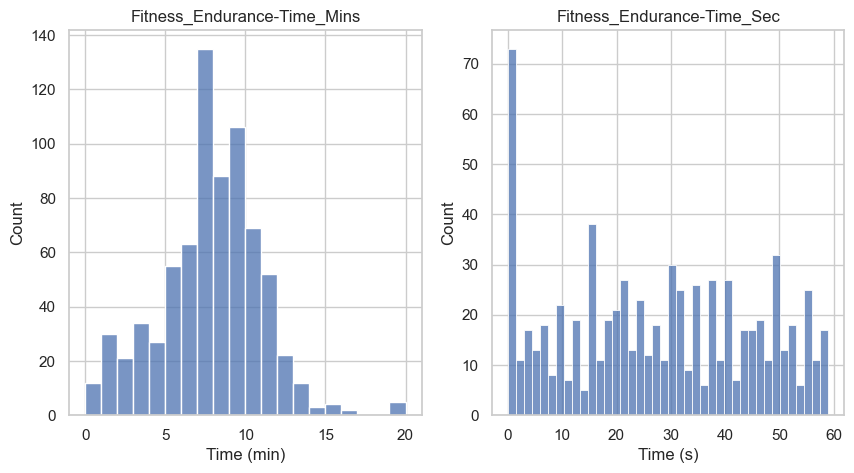

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Fitness Endurance Time (Minutes)
sns.histplot(train['Fitness_Endurance-Time_Mins'], bins=20, ax=axes[0])
axes[0].set_title('Fitness_Endurance-Time_Mins')
axes[0].set_xlabel('Time (min)')

# Fitness Endurance Time (Seconds)
sns.histplot(train['Fitness_Endurance-Time_Sec'], bins=40, ax=axes[1])
axes[1].set_title('Fitness_Endurance-Time_Sec')
axes[1].set_xlabel('Time (s)')

plt.show()

The time values seem normal for both minutes and seconds. The only suspicious value seems to be that there are a lot of cases where the time is an exact minute. This might indicate some inconsistency with measurements, but is rather insignificant and could be ignored.

In [15]:
# Let's define the columns we want to display
cols = [
    'Fitness_Endurance-Max_Stage',
    'Fitness_Endurance-Time_Mins',
    'Fitness_Endurance-Time_Sec'
]

# Let's check is there are any non-numeric time values where stage is not missing
train[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | train['Fitness_Endurance-Time_Sec'].isna())
][cols]

,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec
420,4.0,6.0,NaN
1470,26.0,NaN,NaN
2907,1.0,NaN,26.0
3666,2.0,NaN,NaN


We can see that the there have been suspicious entries for time values. These values should be removed.

In [16]:
train.loc[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | train['Fitness_Endurance-Time_Sec'].isna()), 
    cols
] = np.nan

We can now concatenate the minutes and seconds into seconds for ease of use and simplicity.

In [17]:
# Combine minutes and seconds into total seconds
train['Fitness_Endurance-Time_Sec'] = (
    train['Fitness_Endurance-Time_Mins'] * 60 + train['Fitness_Endurance-Time_Sec']
)

# Drop the minutes and seconds columns
train.drop(columns=['Fitness_Endurance-Time_Mins'], inplace=True)

In [18]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,453.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,577.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the fitness values are gathered by a test and the season is also recorded. Let's see if the season plays any role in the data.

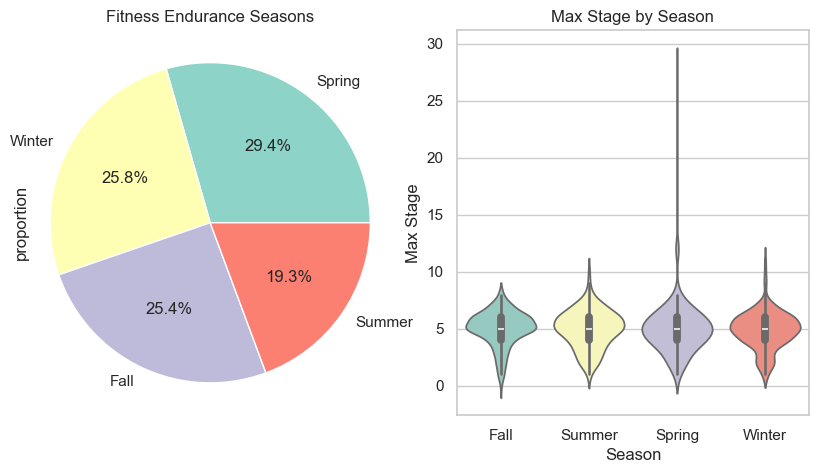

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Fitness Endurance Season
train['Fitness_Endurance-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors, ax=axes[0]
)
axes[0].set_title('Fitness Endurance Seasons')
axes[0].axis('equal')

# Violin plot for Max Stage by Season
sns.violinplot(
    x='Fitness_Endurance-Season',
    y='Fitness_Endurance-Max_Stage',
    data=train,
    palette="Set3",
    ax=axes[1]
)
axes[1].set_title('Max Stage by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Max Stage')

plt.show()

The only substantial difference seems to be the max stage in spring. Let's take a look at it.

In [20]:
high_max_stage_in_spring = train[(train['Fitness_Endurance-Season'] == 'Spring') & (train['Fitness_Endurance-Max_Stage'] > 15)]

Since there is only one person who reached such a high stage then it is not enough to say that the results vary between seasons. Additionally the max stage value seems to be an outlier when considering the time it took to reach it. Let's remove it.

In [21]:
high_max_stage_in_spring['Fitness_Endurance-Time_Sec'] = np.nan
high_max_stage_in_spring['Fitness_Endurance-Max_Stage'] = np.nan

train.loc[high_max_stage_in_spring.index] = high_max_stage_in_spring

C:\Users\uku1\AppData\Local\Temp\ipykernel_29612\1939171394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_max_stage_in_spring['Fitness_Endurance-Time_Sec'] = np.nan
C:\Users\uku1\AppData\Local\Temp\ipykernel_29612\1939171394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_max_stage_in_spring['Fitness_Endurance-Max_Stage'] = np.nan


The last thing is to check if the demographics vary between seasons.

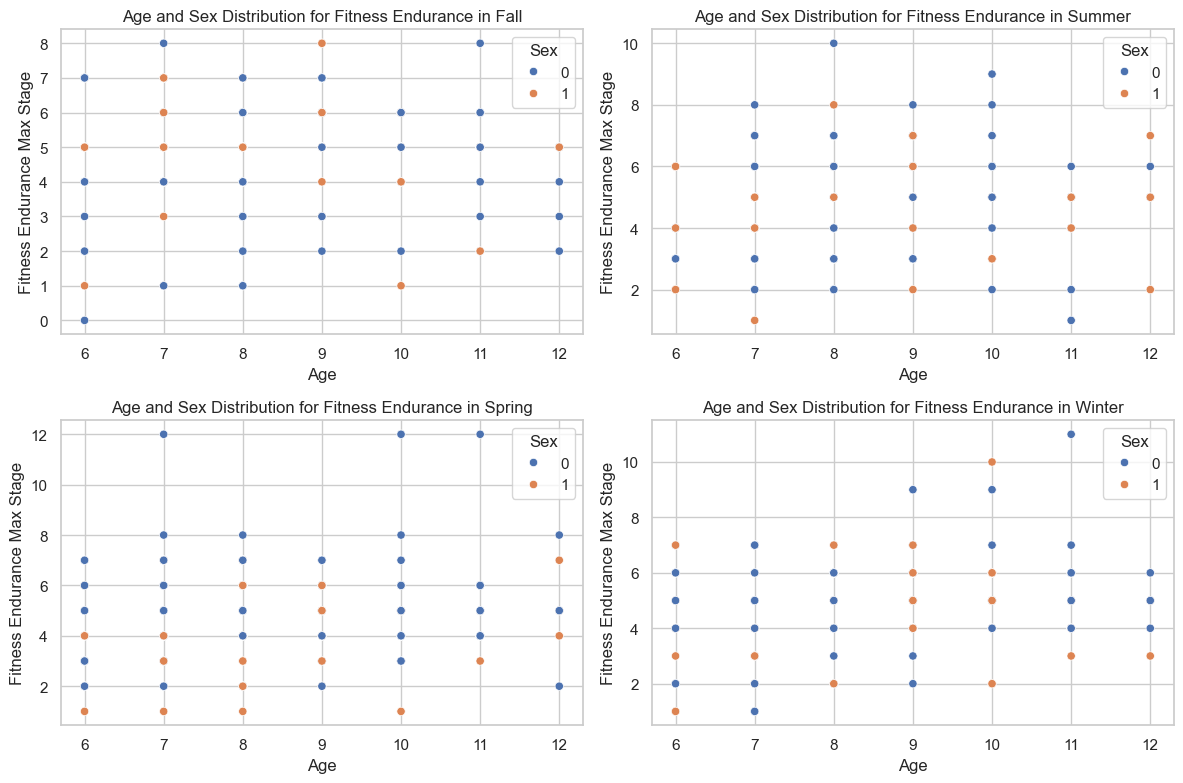

In [22]:
seasons = ['Fall', 'Summer', 'Spring', 'Winter']  # List of seasons

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each season and create a scatter plot in the corresponding subplot
for i, season in enumerate(seasons):
    row = i // 2  # Integer division for row index (0 or 1)
    col = i % 2  # Modulus for column index (0 or 1)
    
    filtered_data = train[train['Fitness_Endurance-Season'] == season]

    # Create the scatter plot in the current subplot
    sns.scatterplot(
        x='Basic_Demos-Age',
        y='Fitness_Endurance-Max_Stage',
        hue='Basic_Demos-Sex',
        data=filtered_data,
        ax=axes[row, col]
    )
    
    # Set title, labels, and legend for each subplot
    axes[row, col].set_title(f'Age and Sex Distribution for Fitness Endurance in {season}')
    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel('Fitness Endurance Max Stage')
    axes[row, col].legend(title='Sex')

plt.tight_layout()

plt.show()

Again no substantial differences. Now we can conclude that the season does not make a big difference in this test.

### Let's display the float values

In [23]:
float_value_fields = data_dict[data_dict['Type'] == 'float']
display(float_value_fields)

,Instrument,Field,Description,Type,Values,Value Labels
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
7,Physical Measures,Physical-BMI,Body Mass Index (kg/m^2),float,NaN,NaN
8,Physical Measures,Physical-Height,Height (in),float,NaN,NaN
9,Physical Measures,Physical-Weight,Weight (lbs),float,NaN,NaN
21,FitnessGram Child,FGC-FGC_GSND,Grip Strength total (non-dominant),float,NaN,NaN
23,FitnessGram Child,FGC-FGC_GSD,Grip Strength total (dominant),float,NaN,NaN
27,FitnessGram Child,FGC-FGC_SRL,Sit & Reach total (left side),float,NaN,NaN
29,FitnessGram Child,FGC-FGC_SRR,Sit & Reach total (right side),float,NaN,NaN
35,Bio-electric Impedance Analysis,BIA-BIA_BMC,Bone Mineral Content,float,NaN,NaN
36,Bio-electric Impedance Analysis,BIA-BIA_BMI,Body Mass Index,float,NaN,NaN


Let's analyze the float values.

In [24]:
for field in float_value_fields['Field']:
    print(f"{field}: {count_zero_values(train, field)}")

Basic_Demos-Age: 0
Physical-BMI: 7
Physical-Height: 0
Physical-Weight: 61
FGC-FGC_GSND: 4
FGC-FGC_GSD: 3
FGC-FGC_SRL: 105
FGC-FGC_SRR: 98
BIA-BIA_BMC: 0
BIA-BIA_BMI: 0
BIA-BIA_BMR: 0
BIA-BIA_DEE: 0
BIA-BIA_ECW: 0
BIA-BIA_FFM: 0
BIA-BIA_FFMI: 0
BIA-BIA_FMI: 0
BIA-BIA_Fat: 0
BIA-BIA_ICW: 0
BIA-BIA_LDM: 0
BIA-BIA_LST: 0
BIA-BIA_SMM: 0
BIA-BIA_TBW: 0
PAQ_A-PAQ_A_Total: 0
PAQ_C-PAQ_C_Total: 0


Right away we can see that there seem to be incorrect values. For example BMI and weight can not be of value 0. Additionaly grip strength total values and sit & reach values are suspicious.

Firstly let's remove the BMI and weight zero values.

In [25]:
train['Physical-BMI'] = train['Physical-BMI'].replace(0, np.nan)
train['Physical-Weight'] = train['Physical-Weight'].replace(0, np.nan)

Before we move on to the FGC, BIA and PAQ values let's analyse the age and physical values some more.

In [26]:
print(train['Basic_Demos-Age'].describe())
print(train['Physical-BMI'].describe())
print(train['Physical-Weight'].describe())
print(train['Physical-Height'].describe())

count    3960.000000
mean       10.433586
std         3.574648
min         5.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        22.000000
Name: Basic_Demos-Age, dtype: float64
count    3015.000000
mean       19.376812
std         5.034191
min         8.522436
25%        15.890526
50%        17.950925
75%        21.588631
max        59.132048
Name: Physical-BMI, dtype: float64
count    3015.000000
mean       90.840060
std        43.161374
min        31.800000
25%        58.200000
50%        77.800000
75%       114.300000
max       315.000000
Name: Physical-Weight, dtype: float64
count    3027.000000
mean       55.946713
std         7.473764
min        33.000000
25%        50.000000
50%        55.000000
75%        62.000000
max        78.500000
Name: Physical-Height, dtype: float64


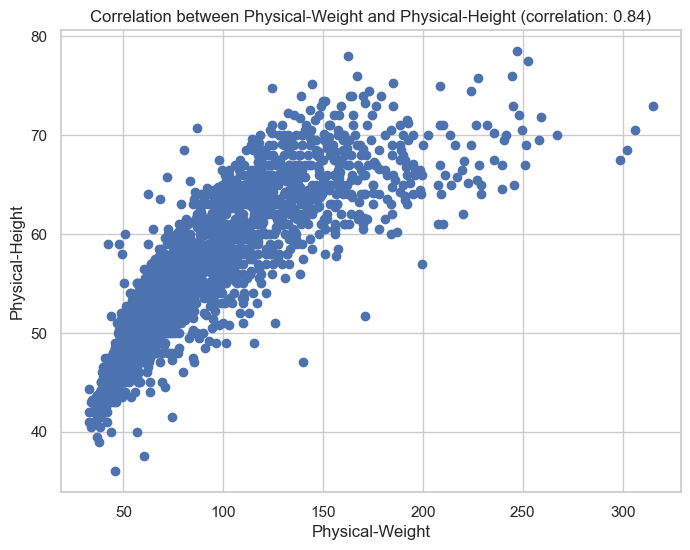

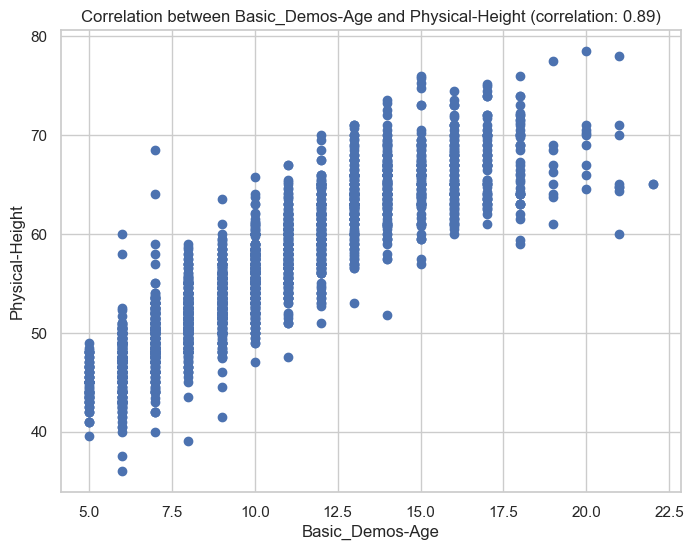

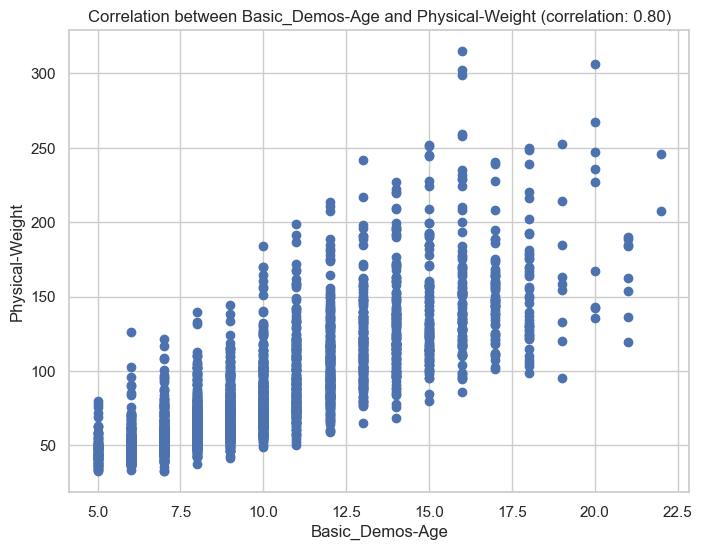

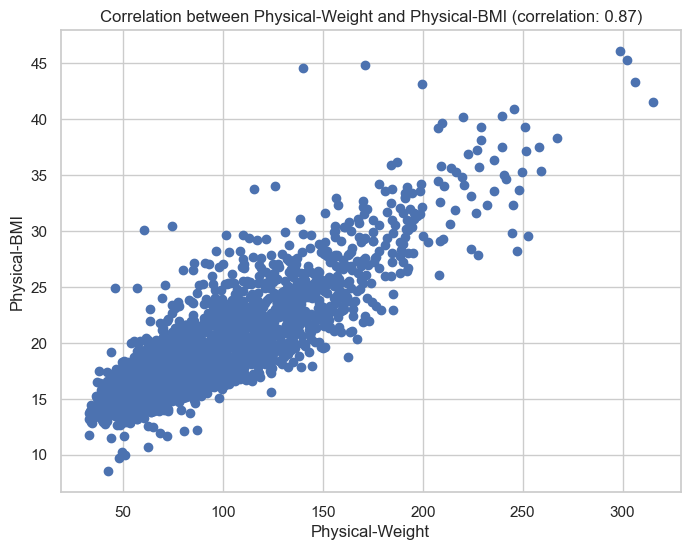

In [56]:
plot_correlation(train, 'Physical-Weight', 'Physical-Height')
plot_correlation(train, 'Basic_Demos-Age', 'Physical-Height')
plot_correlation(train, 'Basic_Demos-Age', 'Physical-Weight')
plot_correlation(train, 'Physical-Weight', 'Physical-BMI')

## Recalculating SII

In [28]:
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

In [29]:
mismatch_rows = train[
    (train['recalc_sii'] != train['sii']) & train['sii'].notna()
]

mismatch_rows[PCIAT_cols + [
    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'
]].style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,recalc_sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,0.000000,nan
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,1.000000,nan
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,0.000000,nan
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,0.000000,nan
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,48.000000,1.000000,nan
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,31.000000,1.000000,nan
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,21.000000,0.000000,nan
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,29.000000,0.000000,nan
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,78.000000,2.000000,nan


In [30]:
train = train.dropna(subset =["recalc_sii"])

In [31]:
train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

train.drop(columns='recalc_sii', inplace=True)

In [32]:
train = train.dropna(subset =['complete_resp_total'])

In [33]:
train.shape

(2671, 82)

In [34]:
train['complete_resp_total'].isna().sum()

0

In [35]:
test.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [36]:
# Identify extra columns in the training set
extra_columns = list(set(train.columns) - set(test.columns))
extra_columns.remove('sii')
extra_columns.remove('complete_resp_total')

train = train.drop(columns=extra_columns)

In [37]:
train.to_csv('data/cleaned_train.csv', index=False)

In [38]:
X_train = train.drop(columns=['sii', 'complete_resp_total', 'id'])
y_train = train['complete_resp_total']
X_train.describe

<bound method NDFrame.describe of      Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex CGAS-Season  \
0                         Fall                5                0      Winter   
1                       Summer                9                0         NaN   
2                       Summer               10                1        Fall   
3                       Winter                9                0        Fall   
5                       Spring               13                1      Winter   
...                        ...              ...              ...         ...   
3953                      Fall                8                0         NaN   
3954                    Summer                7                1         NaN   
3955                      Fall               13                0      Spring   
3957                      Fall               11                0      Spring   
3958                    Spring               13                0      Spring   

     

In [39]:
!pip install catboost

In [40]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

categorical_features = [
    'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season','FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season',
    'PreInt_EduHx-Season', 'SDS-Season',
    'Basic_Demos-Sex',
    'FGC-FGC_CU_Zone',
    'FGC-FGC_GSND_Zone',
    'FGC-FGC_GSD_Zone',
    'FGC-FGC_PU_Zone',
    'FGC-FGC_SRL_Zone',
    'FGC-FGC_SRR_Zone',
    'FGC-FGC_TL_Zone',
    'BIA-BIA_Activity_Level_num',
    'BIA-BIA_Frame_num',
    'PreInt_EduHx-computerinternet_hoursday'
]

X_train[categorical_features] = X_train[categorical_features].astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create CatBoost Pool for better handling of categorical features
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features)

In [41]:
# Initialize CatBoostRegressor
model = CatBoostRegressor(
    iterations=500,       # Number of boosting iterations
    learning_rate=0.1,    # Step size for weight updates
    depth=6,              # Depth of the trees
    loss_function='RMSE', # Regression problem
    verbose=50            # Print training progress every 50 iterations
)

# Train the model
model.fit(train_pool)

# Predict on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

0:	learn: 19.8117933	total: 195ms	remaining: 1m 37s
50:	learn: 15.7134299	total: 2.35s	remaining: 20.7s
100:	learn: 15.0439573	total: 4s	remaining: 15.8s
150:	learn: 14.1003136	total: 6.11s	remaining: 14.1s
200:	learn: 13.3370917	total: 8.24s	remaining: 12.3s
250:	learn: 12.6021723	total: 10.1s	remaining: 10s
300:	learn: 11.8154750	total: 12.2s	remaining: 8.08s
350:	learn: 11.2587879	total: 15.1s	remaining: 6.42s
400:	learn: 10.7647774	total: 17.1s	remaining: 4.23s
450:	learn: 10.2660544	total: 19.3s	remaining: 2.1s
499:	learn: 9.7232644	total: 21.2s	remaining: 0us
Root Mean Squared Error: 17.269929981912057


In [42]:
test[categorical_features] = test[categorical_features].astype(str)

# Prepare the test Pool
test_pool = Pool(test.drop(columns=['id']), cat_features=categorical_features)

# Predict the target values
predicted_scores = model.predict(test_pool)

# Create a DataFrame with id and predicted score
results_df = pd.DataFrame({
    'id': test['id'],  # Include the ID column
    'predicted_score': predicted_scores  # Add the predicted scores
})

results_df.head()

,id,predicted_score
0,00008ff9,35.504335
1,000fd460,18.436838
2,00105258,30.611309
3,00115b9f,20.394614
4,0016bb22,36.378661


In [43]:
# Define the function to calculate SII index
def calculate_sii(predicted_score):
    if pd.isna(predicted_score):  # Handle missing values
        return np.nan
    rounded_score = round(predicted_score)  # Round the predicted score to an integer
    if rounded_score <= 30:
        return 0
    elif 31 <= rounded_score <= 49:
        return 1
    elif 50 <= rounded_score <= 79:
        return 2
    elif rounded_score >= 80:
        return 3
    return np.nan  # Default fallback, though this shouldn't happen
# Apply the function to the predicted_score column
results_df['sii'] = results_df['predicted_score'].apply(calculate_sii)
results_df = results_df.drop(columns='predicted_score')
# Save or display the results
results_df.to_csv('submission_test.csv', index=False)
print(results_df)

          id  sii
0   00008ff9    1
1   000fd460    0
2   00105258    1
3   00115b9f    0
4   0016bb22    1
5   001f3379    0
6   0038ba98    0
7   0068a485    0
8   0069fbed    1
9   0083e397    0
10  0087dd65    1
11  00abe655    1
12  00ae59c9    0
13  00af6387    0
14  00bd4359    1
15  00c0cd71    1
16  00d56d4b    0
17  00d9913d    0
18  00e6167c    0
19  00ebc35d    0
